# Explore here

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

print(f'El ID es: {client_id}')

El ID es: your_client_id


In [13]:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [14]:
client_id='67cb9d5e66824ca9baa58ac432329e0d'
client_secret='f50efc4c256b4b0cbd94e618125d15a3'

In [17]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [18]:
artist_id = "2F9pvj94b52wGKs0OqiNi2"

# Get the top tracks of an artist
results = spotify.artist_top_tracks(artist_id)

canciones = []
for track in results['tracks']:
    canciones.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': track['duration_ms'] / 60000
    })

In [19]:

tracks_df = pd.DataFrame(canciones)

print(tracks_df.head(3))

                  name  popularity  duration_min
0  Como Eran Las Cosas          74      4.008667
1       Irresponsables          73      2.603283
2              El Loco          71      3.097100


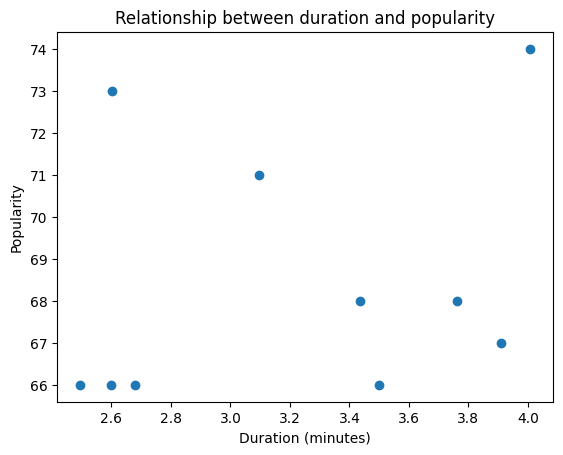

In [20]:
plt.scatter(tracks_df['duration_min'], tracks_df['popularity'])
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.title('Relationship between duration and popularity')
plt.show()